In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('/content/placement.csv')

In [32]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [33]:
df.shape

(100, 4)

In [34]:
import matplotlib.pyplot as plt

In [21]:
df

,cgpa,iq,placement
0,"6,8",123.0,Yes
1,"5,9",106.0,No
2,"5,3",121.0,No
3,"7,4",132.0,Yes
4,"5,8",142.0,No
...,...,...,...
95,"4,3",200.0,No
96,"4,4",42.0,No
97,"6,7",182.0,Yes
98,"6,3",103.0,Yes


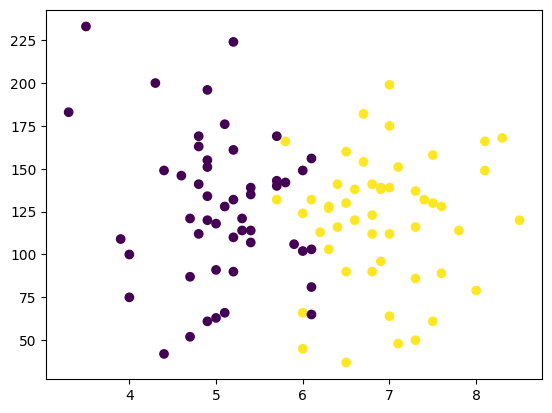

In [37]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [40]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [39]:
# Preprossing
df = df.iloc[:,1:]

In [41]:
# X is matrix
X = df.iloc[:,0:2]
# y = df.iloc[:,2:]
# OR
# y = 1D vector
y = df.iloc[:,-1]

In [42]:
X.shape

(100, 2)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [44]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [45]:
X_train

array([[-0.19843545,  1.13522266],
       [-0.6494251 , -0.03021505],
       [-1.01021683, -0.05611367],
       [ 0.97413766,  0.74674342],
       [-2.27298786,  2.87042991],
       [ 1.24473145,  0.25466972],
       [ 0.16235628, -0.23740398],
       [-2.45338372,  1.57549912],
       [ 1.42512731,  0.15107526],
       [-1.82199821, -1.22155138],
       [ 0.61334593,  1.54960051],
       [ 0.79374179,  0.43596003],
       [ 0.43295007, -0.83307214],
       [-0.9200189 , -1.53233476],
       [ 1.15453352,  0.3841628 ],
       [-0.73962303,  0.25466972],
       [-1.19061269, -0.91076799],
       [-0.73962303,  1.00572958],
       [-0.28863338,  0.53955449],
       [ 0.70354386,  0.48775726],
       [ 0.97413766, -1.920814  ],
       [-0.82982097,  1.39420881],
       [ 0.07215834, -1.48053753],
       [-0.55922717,  0.33236557],
       [-1.01021683,  0.85033788],
       [ 0.25255421,  0.15107526],
       [-1.46120648,  0.69494619],
       [-0.9200189 , -0.80717352],
       [-0.9200189 ,

In [46]:
X_test = scaler.transform(X_test)

In [47]:
X_test

array([[-0.01803959,  0.69494619],
       [-0.73962303,  2.63734237],
       [ 2.05651283,  1.18701989],
       [ 1.33492938, -1.584132  ],
       [ 0.88393972,  0.43596003],
       [-1.10041476,  1.2129185 ],
       [-1.10041476,  0.48775726],
       [-1.82199821, -0.57408598],
       [-1.28081062,  0.61725034],
       [-0.82982097, -1.45463892]])

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf = LogisticRegression()

In [50]:
# Model traning
clf.fit(X_train,y_train)

LogisticRegression()

In [51]:
y_pred = clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)

0.9

In [54]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

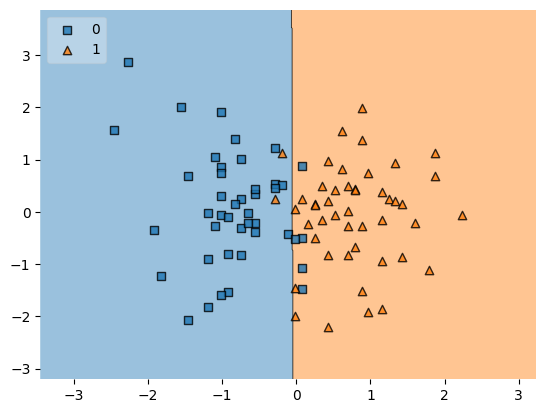

In [55]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [56]:
import pickle

In [57]:
pickle.dump(clf,open('model.pkl', 'wb'))